<a href="https://colab.research.google.com/github/RuchitShivani/Data-Driven-Estimation-of-M-and-X-in-a-Nonlinear-Parametric-System/blob/main/Parametric_Curve_Fitting_L1_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal Parameters:
Theta (°): 28.1209
M: 0.021397
X: 54.9011
Average L1 Distance per point: 25.24339844693974
Score (out of 100): 74.75660155306026


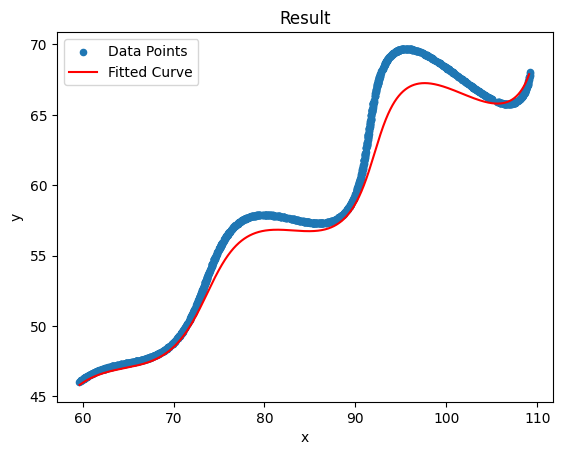

In [8]:

import numpy as np
import pandas as pd
from scipy.optimize import minimize


data = pd.read_csv('xy_data.csv')
x_data = data['x'].values
y_data = data['y'].values

t = np.linspace(6, 60, len(x_data))
def curve(params, t):
    theta_deg, M, X = params
    theta = np.deg2rad(theta_deg)
    x = t * np.cos(theta) - np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.sin(theta) + X
    y = 42 + t * np.sin(theta) + np.exp(M * np.abs(t)) * np.sin(0.3 * t) * np.cos(theta)
    return x, y

def objective(params):
    x_pred, y_pred = curve(params, t)
    return np.sum(np.abs(x_data - x_pred) + np.abs(y_data - y_pred))

initial_guess = [25, 0.0, 50]  # θ, M, X
bounds = [(0, 50), (-0.05, 0.05), (0, 100)]

result = minimize(objective, initial_guess, bounds=bounds, method='L-BFGS-B')
theta_opt, M_opt, X_opt = result.x

print("Optimal Parameters:")
print(f"Theta (°): {theta_opt:.4f}")
print(f"M: {M_opt:.6f}")
print(f"X: {X_opt:.4f}")

best_error = objective(result.x)
normalized_error = best_error / len(x_data)
score = max(0, 100 - normalized_error)
print("Average L1 Distance per point:", normalized_error)
print("Score (out of 100):", score)



import matplotlib.pyplot as plt

x_fit, y_fit = curve(result.x, t)

plt.scatter(x_data, y_data, label='Data Points', s=20)
plt.plot(x_fit, y_fit, 'r-', label='Fitted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Result')
plt.show()
